In [17]:
#  definindo funções de matemática 

import numpy as np

def crossprod(A, B):
    C=np.zeros(3)
    C[0]=A[1]*B[2]-A[2]*B[1]
    C[1]=A[2]*B[0]-A[0]*B[2]
    C[2]=A[0]*B[1]-A[1]*B[0]
    return C 

def mod(F):
    mod=np.sqrt(F[0]*F[0]+F[1]*F[1]+F[2]*F[2])	
    return mod

# teste
A=np.array([1.0,2.0,3.0])
B=np.array([4.0,5.0,6.0])
C=crossprod(A,B)
print("Produto vetorial A x B = ",C)
print("Módulo do vetor C = ",mod(C))

Produto vetorial A x B =  [-3.  6. -3.]
Módulo do vetor C =  7.3484692283495345


In [18]:
# definindo funções de física
def FLorentz(q, v, B): # força de Lorentz
    F=np.zeros(3)
    F = q*crossprod(v, B)
    return F    

def Velocity(v0, a, t):
    v = np.zeros(3)
    vers = np.zeros(3) # versor na direção de v
    for i in range(3): 
        v[i] = v0[i] + a[i] * t

    modv = mod(v) # deve ser diferente de zero
    modv0 = mod(v0)
    for i in range(3):
        vers[i] = v[i] / modv
        v[i] = modv0 * vers[i] 
    return v

def Position(r0, v0, a, t):
    r = np.zeros(3)
    for i in range(3): 
        r[i]=r0[i]+v0[i]*t+(a[i]*t*t)/2
    return r    

def RelMass(m, v0): # massa relativística
    c = 299792458 # m/s
    beta = mod(v0) / c
    #print("beta = %.3e" % beta)
    mR = m / np.sqrt(1 - beta * beta)
    #print("mR = %.3e" % mR)
    return mR

def VariableB(B0, r): # campo magnético variável
    B0[0] = 0
    B0[1] = 1e-4 # Tesla 
    B0[2] = 0
    k = 1.1
    modr = mod(r)
    B = np.zeros(3)
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor inicial
    for i in range(3):
        B[i] = B0[i]
    if modr > 1:
        for i in range(3):
            B[i] = k * rL0 * B0[i] / modr
    return B

import numpy as np
def Bdipolar(r): # campo magnético dipolar

    # constantes
    mi0=np.pi*4E-7 # T.m/A
    m=8E22 # A.m^2, momento magnético da Terra
    mod_r = mod(r)
    if mod_r > 1:
        for i in range(3):

            cos_theta = r[2]/mod_r
            sen_theta = np.sqrt(1 - cos_theta*cos_theta)
            
            sen_phi=r[1]/np.sqrt(r[0]*r[0]+r[1]*r[1])
            cos_phi=r[0]/np.sqrt(r[0]*r[0]+r[1]*r[1])

            Br=(2*m*mi0*cos_theta)/(4*np.pi*mod_r*mod_r*mod_r)
            Btheta=(m*mi0*sen_theta)/(4*np.pi*mod_r*mod_r*mod_r)

            B = np.zeros(3)
            B[0]=(Br*sen_theta*cos_phi + Btheta*cos_theta*cos_phi)
            B[1]=(Br*sen_theta*sen_phi + Btheta*cos_theta*sen_phi)
            B[2]=(Br*cos_theta - Btheta*sen_theta)
            return B
    else:
        B=np.array([0.0,1E-4,0.0])
        return B        


def Energy_to_velocity(E, m, v0): # E em eV, m em kg
    e=1.602176634E-19 # C
    c=299792458 # m/s
    E_joules=E*e
    beta=np.sqrt(1-((m*c*c)/(E_joules))**2)
    if beta < 1:
        v=beta*c
    else:
        print("Velocidade maior que a da luz.")

    vector_v= v * (v0 / mod(v0)) # vetor velocidade
   
    return vector_v


# teste
q=15.0
v=np.array([0.0,1.0,0.0])
B=np.array([0.0,0.0,1.0])
F=FLorentz(q, v, B)
print("Força de Lorentz F = ",F)
r = np.array([1.0,0.0,0.0])
B = Bdipolar(r)
print("Campo magnético dipolar B = ",B)


Força de Lorentz F =  [15.  0.  0.]
Campo magnético dipolar B =  [0.     0.0001 0.    ]


In [19]:
import pandas as pd

#constantes 
c = 299792458 # m/s
e = 1.6e-19 # C
mp = 1.67e-27 # kg
u = 1.66e-27 # kg



def main(q, m, r0, v0, B0):
        
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor
    T=2*np.pi*mR/(q*modB) # periodo de giro
    t=T/10000
    
    positions = []
    for i in range(30000):
        B=VariableB(B0,r0)
        modB=mod(B)
        rL=mR*modv/(q*modB)
        modr=mod(r0)
        #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        F=FLorentz(q,v0,B)
        modF=mod(F)
        a=np.zeros(3)
        for j in range(3):
            a[j]=F[j]/mR
        v=Velocity(v0,a,t)
        r=Position(r0,v0,a,t)
        x=r[0]
        y=r[1]
        z=r[2]
        positions.append([x, y, z])
        for j in range(3):
            r0[j]=r[j]
            v0[j]=v[j]
  

    df = pd.DataFrame(positions, columns=['x', 'y', 'z']) 

    return df  


def main_dipolar(q, m, r0, v0, B0, s):
        
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor
    T=2*np.pi*mR/(q*modB) # periodo de giro
    t=T/1000
    
    positions = []
    for i in range(s):
        B=Bdipolar(r0)
        modB=mod(B)
        rL=mR*modv/(q*modB)
        modr=mod(r0)
        #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        F=FLorentz(q,v0,B)
        modF=mod(F)
        #if i>29999: 
            #print("Força de Lorentz F = ",F)
            #print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        a=np.zeros(3)
        for j in range(3):
            a[j]=F[j]/mR
        v=Velocity(v0,a,t)
        r=Position(r0,v0,a,t)
        x=r[0]
        y=r[1]
        z=r[2]
        positions.append([x, y, z])
        for j in range(3):
            r0[j]=r[j]
            v0[j]=v[j]
  

    df = pd.DataFrame(positions, columns=['x', 'y', 'z']) 

    return df  

def main_dipolar_energy(q, m, r0, E, B0, s):
    v0 = Energy_to_velocity(E, m, np.array([1.0, 0.0, 0.0]))    
    modv=mod(v0)
    modB=mod(B0)
    mR=RelMass(m,v0)
    rL0=mR*modv/(q*modB) #raio de Larmor
    T=2*np.pi*mR/(q*modB) # periodo de giro
    t=T/1000
    
    positions = []
    for i in range(s):
        B=Bdipolar(r0)
        modB=mod(B)
        rL=mR*modv/(q*modB)
        modr=mod(r0)
        #if i>0: print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        F=FLorentz(q,v0,B)
        modF=mod(F)
        #if i>29999: 
            #print("Força de Lorentz F = ",F)
            #print("%.3e %.3e %.3e \n" % (t*i,modr,rL))
        a=np.zeros(3)
        for j in range(3):
            a[j]=F[j]/mR
        v=Velocity(v0,a,t)
        r=Position(r0,v0,a,t)
        x=r[0]
        y=r[1]
        z=r[2]
        positions.append([x, y, z])
        for j in range(3):
            r0[j]=r[j]
            v0[j]=v[j]
  

    df = pd.DataFrame(positions, columns=['x', 'y', 'z']) 

    return df  



In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_trajectory2(df, name):
    # Configurar para abrir em janela externa
    plt.switch_backend('TkAgg')  # ou 'Qt5Agg'
    
    x, y, z = df['x'].values, df['y'].values, df['z'].values

    # Cria figura 3D
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Cria segmentos de linha
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Coloração gradual ao longo do tempo
    norm = plt.Normalize(0, len(x))
    lc = Line3DCollection(segments, cmap='plasma', norm=norm)
    lc.set_array(np.arange(len(x)))
    lc.set_linewidth(2)
    ax.add_collection(lc)

    # Ajusta limites e escala igual
    max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min()) / 2.0
    mid_x, mid_y, mid_z = (x.max()+x.min())/2.0, (y.max()+y.min())/2.0, (z.max()+z.min())/2.0
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # Eixos e título
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')
    ax.set_title(f'Trajetória da {name}')

    # Barra de cores
    cbar = fig.colorbar(lc, ax=ax, pad=0.1)
    cbar.set_label('Tempo (índice da simulação)', rotation=270, labelpad=15)

    # Ângulo inicial de visualização
    ax.view_init(elev=25, azim=45)
    
    # TOOLTIP - Mostrar coordenadas quando passar o mouse
    annot = ax.text2D(0.02, 0.95, "", transform=ax.transAxes, 
                     bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7),
                     fontsize=10)
    annot.set_visible(False)
    
    def on_plot_hover(event):
        if event.inaxes == ax:
            # Converte coordenadas da tela para coordenadas 3D
            x_mouse, y_mouse = event.xdata, event.ydata
            if x_mouse is not None and y_mouse is not None:
                # Encontra o ponto mais próximo na trajetória
                distances = np.sqrt((x - x_mouse)**2 + (y - y_mouse)**2)
                closest_idx = np.argmin(distances)
                
                coord_text = f"Ponto {closest_idx}\nX: {x[closest_idx]:.3f}\nY: {y[closest_idx]:.3f}\nZ: {z[closest_idx]:.3f}"
                annot.set_text(coord_text)
                annot.set_visible(True)
                fig.canvas.draw_idle()
        else:
            annot.set_visible(False)
            fig.canvas.draw_idle()
    
    # CONTROLES DE ROTAÇÃO COM TECLADO
    def on_key_press(event):
        elev, azim = ax.elev, ax.azim
        
        if event.key == 'up':
            ax.view_init(elev=elev+10, azim=azim)
        elif event.key == 'down':
            ax.view_init(elev=elev-10, azim=azim)
        elif event.key == 'left':
            ax.view_init(elev=elev, azim=azim-10)
        elif event.key == 'right':
            ax.view_init(elev=elev, azim=azim+10)
        elif event.key == 'r':  # Reset
            ax.view_init(elev=25, azim=45)
        elif event.key == 'x':  # Vista de cima do eixo X
            ax.view_init(elev=90, azim=-90)
        elif event.key == 'y':  # Vista de cima do eixo Y
            ax.view_init(elev=90, azim=0)
        elif event.key == 'z':  # Vista de cima do eixo Z
            ax.view_init(elev=0, azim=-90)
        
        fig.canvas.draw()
        print(f"Elevação: {ax.elev}°, Azimute: {ax.azim}°")
    
    # Conectar eventos
    fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)
    fig.canvas.mpl_connect('key_press_event', on_key_press)
    
    # Instruções
    print("\n=== CONTROLES INTERATIVOS ===")
    print("Mouse: Arraste para rotacionar, Scroll para zoom")
    print("Setas: Rotação precisa (10°)")
    print("X/Y/Z: Vistas de cima dos eixos")
    print("R: Reset da vista inicial")
    print("Passe o mouse sobre a trajetória para ver coordenadas")
    
    plt.tight_layout()
    plt.show(block=True)

# Exemplo de uso:
r_terra=6371E3 # raio da Terra em metros

s=30000
q=1*e
m=mp
r0=[-r_terra,0.0,r_terra]
E = 10**9 # eV
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar_energy(q, m, r0, E, B0, s)
#print(df_proton)
plot_trajectory2(df_proton, 'trajetória do próton no campo dipolar')


=== CONTROLES INTERATIVOS ===
Mouse: Arraste para rotacionar, Scroll para zoom
Setas: Rotação precisa (10°)
X/Y/Z: Vistas de cima dos eixos
R: Reset da vista inicial
Passe o mouse sobre a trajetória para ver coordenadas
Elevação: 90°, Azimute: -90°
Elevação: 90°, Azimute: 0°
Elevação: 0°, Azimute: -90°
Elevação: 25°, Azimute: 45°


In [ ]:
def plot_trajectory(df, name):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(df['x'], df['y'], df['z'], 'purple')
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')
    ax.set_title(f'Gráfico da {name}')
    plt.show()

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.art3d import Line3DCollection

def plot_trajectory2(df, name):
    x, y, z = df['x'].values, df['y'].values, df['z'].values

    # Cria figura 3D
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')

    # Cria segmentos de linha
    points = np.array([x, y, z]).T.reshape(-1, 1, 3)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Coloração gradual ao longo do tempo
    norm = plt.Normalize(0, len(x))
    lc = Line3DCollection(segments, cmap='plasma', norm=norm)
    lc.set_array(np.arange(len(x)))
    lc.set_linewidth(2)
    ax.add_collection(lc)

    # Ajusta limites e escala igual
    max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min()) / 2.0
    mid_x, mid_y, mid_z = (x.max()+x.min())/2.0, (y.max()+y.min())/2.0, (z.max()+z.min())/2.0
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)

    # Eixos e título
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')
    ax.set_title(f'Trajetória da {name}')

    # Barra de cores
    cbar = fig.colorbar(lc, ax=ax, pad=0.1)
    cbar.set_label('Tempo (índice da simulação)', rotation=270, labelpad=15)

    # Ângulo inicial de visualização
    ax.view_init(elev=25, azim=45)
    plt.tight_layout()
    plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_trajectory3(df, name):
    fig = plt.figure(figsize=(7,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(df['x'], df['y'], df['z'], color='purple', linewidth=1.5)
    
    ax.set_xlabel('Eixo X')
    ax.set_ylabel('Eixo Y')
    ax.set_zlabel('Eixo Z')
    ax.set_title(f'Trajetória da {name}')
    
    # Escala igual nos três eixos (evita distorções)
    x, y, z = df['x'], df['y'], df['z']
    max_range = max(x.max()-x.min(), y.max()-y.min(), z.max()-z.min()) / 2.0
    mid_x, mid_y, mid_z = (x.max()+x.min())/2.0, (y.max()+y.min())/2.0, (z.max()+z.min())/2.0
    ax.set_xlim(mid_x - max_range, mid_x + max_range)
    ax.set_ylim(mid_y - max_range, mid_y + max_range)
    ax.set_zlim(mid_z - max_range, mid_z + max_range)
    
    plt.tight_layout()
    plt.show()

In [ ]:
r_terra=6371E3 # raio da Terra em metros


s=3000
q=1*e
m=mp
r0=[-r_terra,0.0,r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory2(df_proton, 'trajetória do próton no campo dipolar')

# dist. 1
s=3000
q=1*e
m=mp
r0=[r_terra,0.0,-r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory2(df_proton, 'trajetória do próton no campo dipolar')


# dist. 1
s=3000
q=1*e
m=mp
r0=[r_terra,0.0,-r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory3(df_proton, 'trajetória do próton no campo dipolar')

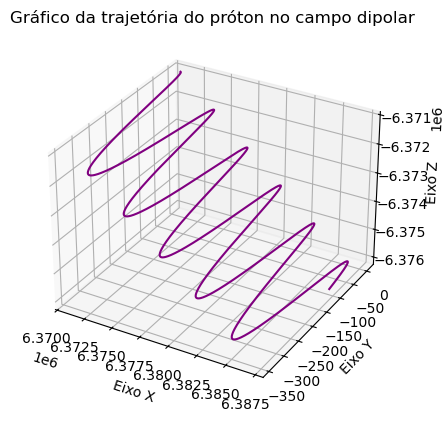

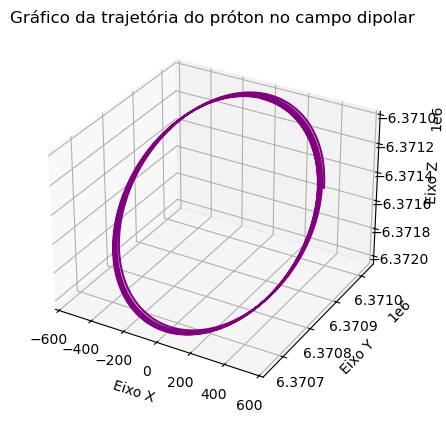

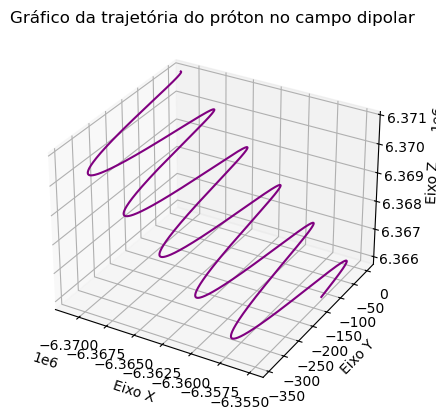

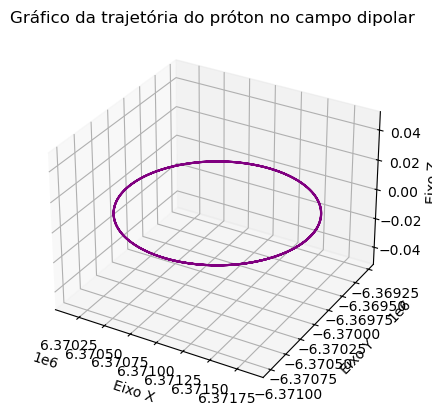

In [ ]:
#rodando para o próton com campo dipolar

r_terra=6371E3 # raio da Terra em metros

# dist. 1
s=300000
q=1*e
m=mp
r0=[r_terra,0.0,-r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

#  dist. 2
s=300000
q=1*e
m=mp
r0=[0.0,r_terra,-r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

# dist. 3
s=300000
q=1*e
m=mp
r0=[-r_terra,0.0,r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

# dist. 4
s=300000
q=1*e
m=mp
r0=[r_terra,-r_terra,0.0]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

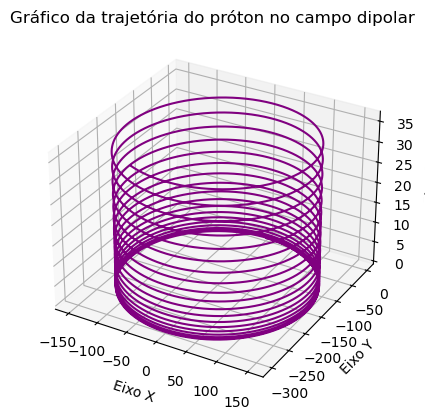

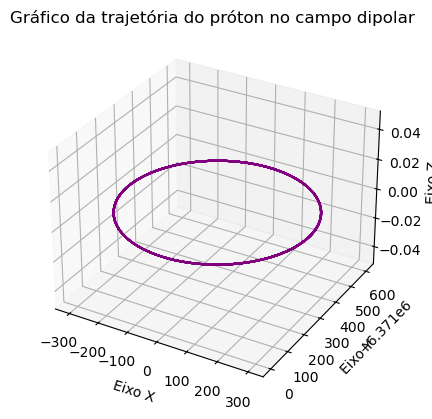

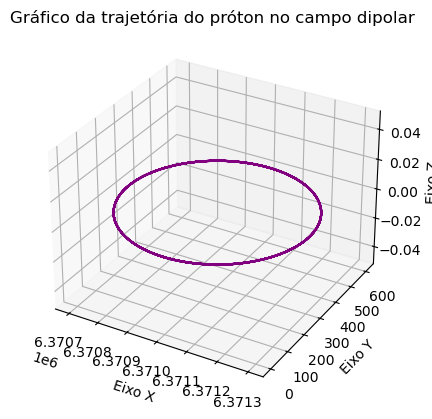

In [ ]:
# dist. 1
r_terra=6371E3 # raio da Terra em metros
s=300000
q=1*e
m=mp
r0=[1.0,0.0,r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

# dist. 1
r_terra=6371E3 # raio da Terra em metros
s=300000
q=1*e
m=mp
r0=[0.0,r_terra,0.0]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')


# dist. 1
r_terra=6371E3 # raio da Terra em metros
s=300000
q=1*e
m=mp
r0=[r_terra,0.0,0.0]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

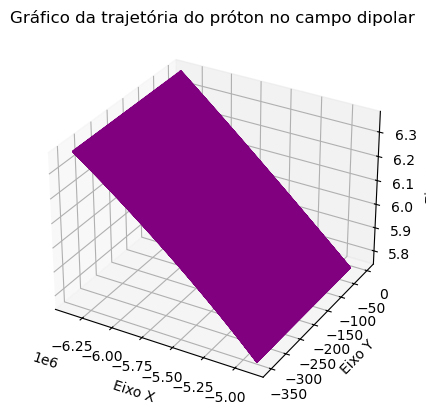

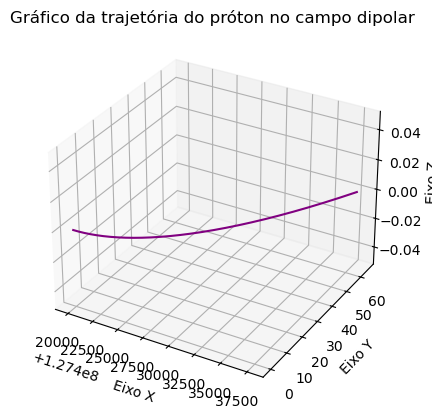

In [ ]:
#rodando para o próton com campo dipolar

r_terra=6371E3 # raio da Terra em metros

# dist. 1
s=30000000
q=1*e
m=mp
r0=[-r_terra,0.0,r_terra]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')

#  dist. 2
s=300000
q=1*e
m=mp
r0=[20*r_terra,0.0,0.0]
v0=[900000,0,0] # m/s
B0=[0.0,1E-4,0.0]
df_proton = main_dipolar(q, m, r0, v0, B0, s)
#print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton no campo dipolar')


                  x             y             z
0         19.659731      2.808659      2.814836
1         37.767019      5.617318     16.448211
2         44.576853      7.516849     35.952265
3         42.923563      9.196394     56.233683
4         34.840940     10.766066     74.783239
...             ...           ...           ...
29995  20536.084947  11286.687098 -13368.587714
29996  20547.654060  11287.049211 -13352.206585
29997  20559.209773  11287.411324 -13335.815999
29998  20570.752078  11287.773437 -13319.415969
29999  20582.280968  11288.135550 -13303.006506

[30000 rows x 3 columns]


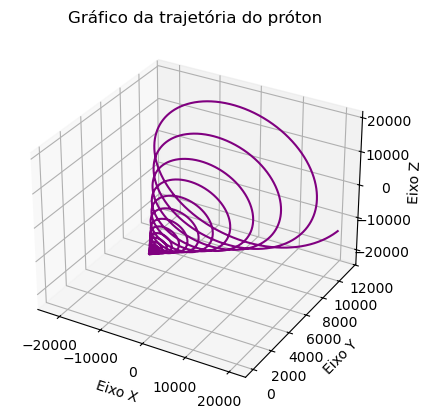

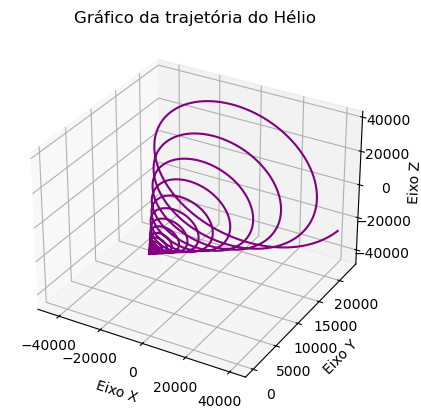

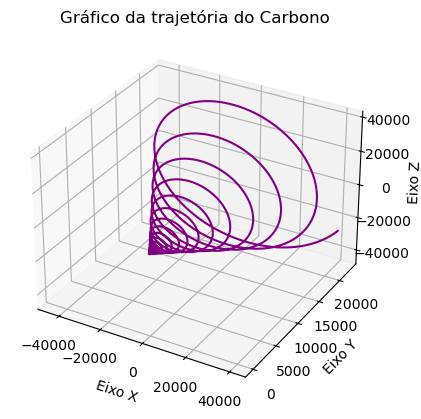

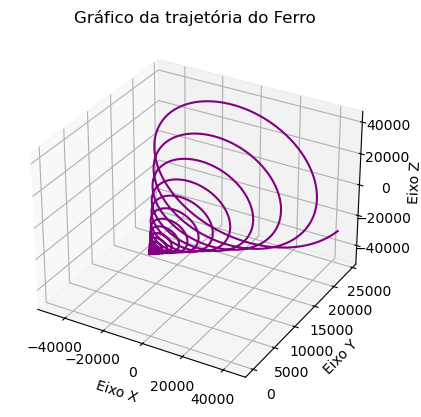

In [ ]:
s=3000

#Rodando para o próton
q=1*e
m=mp
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_proton = main(q, m, r0, v0, B0)
print(df_proton)
plot_trajectory(df_proton, 'trajetória do próton')

#Rodando para o He
q=2*e
m=4*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_helio = main(q, m, r0, v0, B0)
#print(df_helium)
plot_trajectory(df_helio, 'trajetória do Hélio')

#Rodando para o C
q=6*e
m=12*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_carbono = main(q, m, r0, v0, B0)
#print(df_carbono)
plot_trajectory(df_carbono, 'trajetória do Carbono')

#Rodando para o Fe
q=26*e
m=56*u
r0=[0.0,0.0,0.0]
v0=[0.7*c,0.1*c,0.1*c]
B0=[0.0,1E-4,0.0]
df_ferro = main(q, m, r0, v0, B0)
#print(df_ferro)
plot_trajectory(df_ferro, 'trajetória do Ferro')

In [ ]:
import os
#os.startfile("C:/root/bin/root.exe")
